In [18]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import model_from_json

### Original Model

In [2]:
model_path = 'onnx-to-keras-master/original_model.h5'
model_orig = keras.models.load_model(model_path)

In [3]:
model_orig.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_666 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][26]       
__________________________________________________________________________________________________
conv2d_transpose_667 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][27]       
__________________________________________________________________________________________________
conv2d_transpose_668 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][28]       
__________________________________________________________________________________________________
conv2d_transpose_669 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][29]       
__________________________________________________________________________________________________
conv2d_transpose_670 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][30]       
__________________________________________________________________________________________________
conv2d_tra

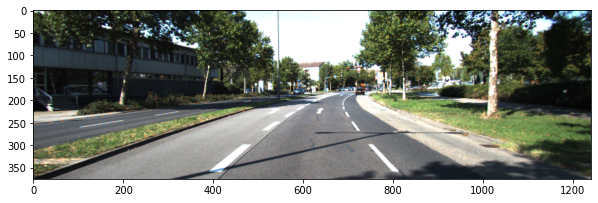

In [4]:
img_path = '000038.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [5]:
img = cv2.resize(img, (832, 288))
img_test = np.array([img/255])
print(img_test.shape)
print(np.amin(img_test), np.amax(img_test))

(1, 288, 832, 3)
0.0 1.0


In [6]:
output = model_orig.predict(img_test)

In [7]:
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


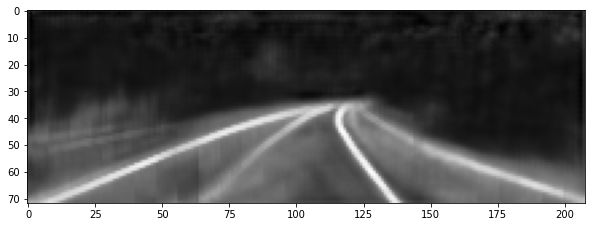

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()

### Cloned Model

In [9]:
model = keras.models.clone_model(model_orig)
model.set_weights(model_orig.get_weights())
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

                                                                 conv2d_transpose_662[0][0]       
                                                                 conv2d_transpose_663[0][0]       
                                                                 conv2d_transpose_664[0][0]       
                                                                 conv2d_transpose_665[0][0]       
                                                                 conv2d_transpose_666[0][0]       
                                                                 conv2d_transpose_667[0][0]       
                                                                 conv2d_transpose_668[0][0]       
                                                                 conv2d_transpose_669[0][0]       
                                                                 conv2d_transpose_670[0][0]       
                                                                 conv2d_transpose_671[0][0]       
          

In [10]:
output = model.predict(img_test)
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


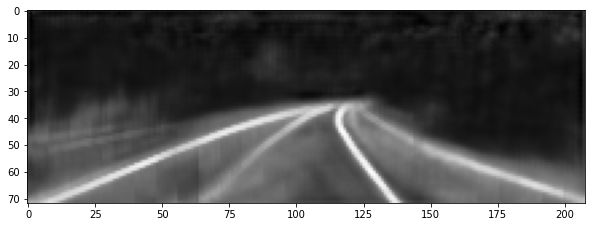

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()

### Prunning

In [12]:
layers = model.layers

In [17]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    orig_layer_name = layer.name
    if 'conv2d' in layer.name:
        if 'transpose' not in layer.name:
            print(f'Layer {i} - Layer Name: {orig_layer_name}')
            orig_conv_layer = model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()
            print(orig_conv_layer_weights[0].shape, orig_conv_layer_weights[1].shape)

Layer 1 - Layer Name: conv2d
(7, 7, 3, 16) (16,)
Layer 3 - Layer Name: conv2d_1
(3, 3, 16, 16) (16,)
Layer 6 - Layer Name: conv2d_2
(3, 3, 16, 32) (32,)
Layer 9 - Layer Name: conv2d_4
(3, 3, 32, 64) (64,)
Layer 12 - Layer Name: conv2d_5
(3, 3, 64, 64) (64,)
Layer 13 - Layer Name: conv2d_3
(1, 1, 32, 64) (64,)
Layer 16 - Layer Name: conv2d_6
(3, 3, 64, 64) (64,)
Layer 18 - Layer Name: conv2d_7
(3, 3, 64, 64) (64,)
Layer 22 - Layer Name: conv2d_8
(1, 1, 128, 64) (64,)
Layer 25 - Layer Name: conv2d_10
(3, 3, 64, 128) (128,)
Layer 28 - Layer Name: conv2d_11
(3, 3, 128, 128) (128,)
Layer 29 - Layer Name: conv2d_9
(1, 1, 64, 128) (128,)
Layer 32 - Layer Name: conv2d_12
(3, 3, 128, 128) (128,)
Layer 34 - Layer Name: conv2d_13
(3, 3, 128, 128) (128,)
Layer 38 - Layer Name: conv2d_14
(1, 1, 256, 128) (128,)
Layer 40 - Layer Name: conv2d_15
(3, 3, 128, 128) (128,)
Layer 42 - Layer Name: conv2d_16
(3, 3, 128, 128) (128,)
Layer 45 - Layer Name: conv2d_17
(3, 3, 128, 128) (128,)
Layer 47 - Layer Na

In [49]:
# Save weights and biases: Layer N
conv_layer = model.get_layer("conv2d")
conv_layer_weights = conv_layer.get_weights()
print(conv_layer_weights[0].shape)
print(conv_layer_weights[1].shape)
print(conv_layer_weights)

(7, 7, 3, 16)
(16,)
[array([[[[-8.14274419e-03, -5.00938948e-03,  1.11375004e-04, ...,
          -5.06431609e-03, -0.00000000e+00, -6.81478390e-03],
         [ 1.29459994e-02, -7.40770297e-03,  9.51805487e-05, ...,
           9.03322361e-03, -0.00000000e+00, -7.99587462e-03],
         [-1.25498353e-02, -3.43493070e-03,  2.52215628e-04, ...,
           1.01725990e-02, -0.00000000e+00,  2.79334630e-03]],

        [[ 9.95084830e-03, -4.52523818e-03,  1.32494053e-04, ...,
          -4.87843528e-03, -0.00000000e+00,  1.88076156e-04],
         [ 4.47395752e-04, -5.94828092e-03,  1.55420668e-04, ...,
           2.45608622e-03,  0.00000000e+00,  1.42806923e-04],
         [-9.77700297e-03, -3.46008316e-03,  2.92333774e-04, ...,
           3.29147745e-03,  0.00000000e+00,  5.93674276e-03]],

        [[ 1.59322545e-02, -5.32021746e-03,  1.09248409e-04, ...,
          -1.86950061e-03, -0.00000000e+00, -2.50995602e-03],
         [-1.33549850e-02, -5.72775537e-03,  1.64048062e-04, ...,
          -7.

In [50]:
# Save weights and biases: Layer N+1
conv_layer_1 = model.get_layer("conv2d_1")
conv_layer_1_weights = conv_layer_1.get_weights()
print(conv_layer_1_weights[0].shape)
print(conv_layer_1_weights[1].shape)
print(conv_layer_1_weights)

(3, 3, 16, 16)
(16,)
[array([[[[ 7.88958296e-02, -5.18674105e-02, -2.63862580e-01, ...,
           7.81138241e-02, -2.52305180e-01, -1.74870193e-02],
         [ 5.34896320e-03,  1.95345432e-02,  5.35540953e-02, ...,
           7.83972740e-02, -6.24833144e-02, -3.68548394e-03],
         [ 7.46881473e-04,  1.51436753e-03,  1.13860588e-03, ...,
          -4.75609768e-03,  1.20851339e-03,  2.02838273e-04],
         ...,
         [ 2.67602014e-03, -6.18011109e-04, -9.72917024e-03, ...,
          -9.49854553e-02, -8.87903795e-02,  6.95395377e-03],
         [ 5.11614069e-42, -4.23192136e-43,  2.08232952e-42, ...,
           1.26004758e-41, -7.50675587e-42,  9.44475165e-43],
         [-1.11700874e-02, -2.01655761e-03,  8.13455693e-03, ...,
          -3.29631269e-02,  4.07478958e-02, -5.70154982e-04]],

        [[ 4.69449721e-02,  7.80612081e-02, -1.87313855e-01, ...,
          -8.75673722e-03, -1.40182123e-01,  9.76022426e-03],
         [-1.10128541e-02,  1.50987739e-02,  2.79111601e-02, ...,


In [52]:
remaining_channels = 12

# Layer N
orig_w = conv_layer_weights[0]
orig_b = conv_layer_weights[1]

temp_w = orig_w[:,:,:,0:remaining_channels]
temp_b = orig_b[0:remaining_channels]

print(temp_w.shape, temp_b.shape)


# Layer N+1
orig_w_1 = conv_layer_1_weights[0]
orig_b_1 = conv_layer_1_weights[1]

temp_w_1 = orig_w_1[:,:,0:remaining_channels,:]
temp_b_1 = orig_b_1

print(temp_w_1.shape, temp_b_1.shape)

(7, 7, 3, 12) (12,)
(3, 3, 12, 16) (16,)


In [22]:
# Create new model
model.layers[1].filters = remaining_channels
new_model = model_from_json(model.to_json())
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 12)    1776        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 12)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    1744        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_632 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][56]       
__________________________________________________________________________________________________
conv2d_transpose_633 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][57]       
__________________________________________________________________________________________________
conv2d_transpose_634 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][58]       
__________________________________________________________________________________________________
conv2d_transpose_635 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][59]       
__________________________________________________________________________________________________
conv2d_transpose_636 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][60]       
__________________________________________________________________________________________________
conv2d_tra

In [25]:
for i in range(len(new_model.layers)):
    layer = new_model.layers[i]
    orig_layer_name = layer.name
    if 'conv2d' in layer.name:
        
        print(i, '-', orig_layer_name)
        
        orig_conv_layer = new_model.get_layer(orig_layer_name)
        orig_conv_layer_weights = orig_conv_layer.get_weights()
        print(orig_conv_layer_weights[0].shape, orig_conv_layer_weights[1].shape)
        
    if i == 20: break

1 - conv2d
(7, 7, 3, 12) (12,)
3 - conv2d_1
(3, 3, 12, 16) (16,)
6 - conv2d_2
(3, 3, 16, 32) (32,)
9 - conv2d_4
(3, 3, 32, 64) (64,)
12 - conv2d_5
(3, 3, 64, 64) (64,)
13 - conv2d_3
(1, 1, 32, 64) (64,)
16 - conv2d_6
(3, 3, 64, 64) (64,)
18 - conv2d_7
(3, 3, 64, 64) (64,)


In [56]:
#### COMPARE ####

# New Model Weights
conv_layer_new = new_model.get_layer("conv2d_1")
conv_layer_weights_new = conv_layer_new.get_weights()
print(conv_layer_weights_new[0].shape)
print(conv_layer_weights_new[1].shape)
print(conv_layer_weights_new)

(3, 3, 12, 16)
(16,)
[array([[[[ 7.88958296e-02, -5.18674105e-02, -2.63862580e-01, ...,
           7.81138241e-02, -2.52305180e-01, -1.74870193e-02],
         [ 5.34896320e-03,  1.95345432e-02,  5.35540953e-02, ...,
           7.83972740e-02, -6.24833144e-02, -3.68548394e-03],
         [ 7.46881473e-04,  1.51436753e-03,  1.13860588e-03, ...,
          -4.75609768e-03,  1.20851339e-03,  2.02838273e-04],
         ...,
         [-3.09967220e-42, -1.63531531e-42,  6.92381571e-42, ...,
          -1.82042684e-41, -5.48187959e-42, -3.94745777e-42],
         [-3.10758762e-02,  1.16557172e-02, -4.33071889e-02, ...,
           1.18906915e-01, -1.29044637e-01,  4.37121931e-03],
         [-4.60046286e-42,  1.03415827e-42, -4.24593435e-43, ...,
           1.06526709e-41,  8.89824525e-43,  1.36346341e-42]],

        [[ 4.69449721e-02,  7.80612081e-02, -1.87313855e-01, ...,
          -8.75673722e-03, -1.40182123e-01,  9.76022426e-03],
         [-1.10128541e-02,  1.50987739e-02,  2.79111601e-02, ...,


In [57]:
# Original Model Weights
conv_layer_new = model.get_layer("conv2d_1")
conv_layer_weights_new = conv_layer_new.get_weights()
print(conv_layer_weights_new[0].shape)
print(conv_layer_weights_new[1].shape)
print(conv_layer_weights_new)

(3, 3, 16, 16)
(16,)
[array([[[[ 7.88958296e-02, -5.18674105e-02, -2.63862580e-01, ...,
           7.81138241e-02, -2.52305180e-01, -1.74870193e-02],
         [ 5.34896320e-03,  1.95345432e-02,  5.35540953e-02, ...,
           7.83972740e-02, -6.24833144e-02, -3.68548394e-03],
         [ 7.46881473e-04,  1.51436753e-03,  1.13860588e-03, ...,
          -4.75609768e-03,  1.20851339e-03,  2.02838273e-04],
         ...,
         [ 2.67602014e-03, -6.18011109e-04, -9.72917024e-03, ...,
          -9.49854553e-02, -8.87903795e-02,  6.95395377e-03],
         [ 5.11614069e-42, -4.23192136e-43,  2.08232952e-42, ...,
           1.26004758e-41, -7.50675587e-42,  9.44475165e-43],
         [-1.11700874e-02, -2.01655761e-03,  8.13455693e-03, ...,
          -3.29631269e-02,  4.07478958e-02, -5.70154982e-04]],

        [[ 4.69449721e-02,  7.80612081e-02, -1.87313855e-01, ...,
          -8.75673722e-03, -1.40182123e-01,  9.76022426e-03],
         [-1.10128541e-02,  1.50987739e-02,  2.79111601e-02, ...,


In [55]:
# Set weights for Layer N and Layer N+1

conv_layer_temp = new_model.get_layer("conv2d")
conv_layer_temp.set_weights([temp_w, temp_b])

conv_layer_temp_1 = new_model.get_layer("conv2d_1")
conv_layer_temp_1.set_weights([temp_w_1, temp_b_1])

In [34]:
# Set weights for other layers

layers = model.layers
p_layers = new_model.layers

for i in range(len(model.layers)):
    
    if i >= 6:
    
        layer = model.layers[i]
        layer_p = new_model.layers[i]

        orig_layer_name = layer.name
        prun_layer_name = layer_p.name

        if 'conv2d' in layer.name:

            print(i)
            print(orig_layer_name, "-", prun_layer_name)

            orig_conv_layer = model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()

            prun_conv_layer = new_model.get_layer(prun_layer_name)
            prun_conv_layer.set_weights(orig_conv_layer_weights)

6
conv2d_2 - conv2d_2
9
conv2d_4 - conv2d_4
12
conv2d_5 - conv2d_5
13
conv2d_3 - conv2d_3
16
conv2d_6 - conv2d_6
18
conv2d_7 - conv2d_7
22
conv2d_8 - conv2d_8
25
conv2d_10 - conv2d_10
28
conv2d_11 - conv2d_11
29
conv2d_9 - conv2d_9
32
conv2d_12 - conv2d_12
34
conv2d_13 - conv2d_13
38
conv2d_14 - conv2d_14
40
conv2d_15 - conv2d_15
42
conv2d_16 - conv2d_16
45
conv2d_17 - conv2d_17
47
conv2d_18 - conv2d_18
52
conv2d_19 - conv2d_19
55
conv2d_21 - conv2d_21
58
conv2d_22 - conv2d_22
59
conv2d_20 - conv2d_20
62
conv2d_23 - conv2d_23
64
conv2d_24 - conv2d_24
68
conv2d_25 - conv2d_25
70
conv2d_26 - conv2d_26
72
conv2d_27 - conv2d_27
75
conv2d_28 - conv2d_28
77
conv2d_29 - conv2d_29
82
conv2d_30 - conv2d_30
85
conv2d_32 - conv2d_32
88
conv2d_33 - conv2d_33
89
conv2d_31 - conv2d_31
92
conv2d_34 - conv2d_34
94
conv2d_35 - conv2d_35
98
conv2d_36 - conv2d_36
100
conv2d_37 - conv2d_37
103
conv2d_transpose - conv2d_transpose
104
conv2d_transpose_1 - conv2d_transpose_1
105
conv2d_transpose_2 - conv2d_t

285
conv2d_transpose_182 - conv2d_transpose_182
286
conv2d_transpose_183 - conv2d_transpose_183
287
conv2d_transpose_184 - conv2d_transpose_184
288
conv2d_transpose_185 - conv2d_transpose_185
289
conv2d_transpose_186 - conv2d_transpose_186
290
conv2d_transpose_187 - conv2d_transpose_187
291
conv2d_transpose_188 - conv2d_transpose_188
292
conv2d_transpose_189 - conv2d_transpose_189
293
conv2d_transpose_190 - conv2d_transpose_190
294
conv2d_transpose_191 - conv2d_transpose_191
295
conv2d_transpose_192 - conv2d_transpose_192
296
conv2d_transpose_193 - conv2d_transpose_193
297
conv2d_transpose_194 - conv2d_transpose_194
298
conv2d_transpose_195 - conv2d_transpose_195
299
conv2d_transpose_196 - conv2d_transpose_196
300
conv2d_transpose_197 - conv2d_transpose_197
301
conv2d_transpose_198 - conv2d_transpose_198
302
conv2d_transpose_199 - conv2d_transpose_199
303
conv2d_transpose_200 - conv2d_transpose_200
304
conv2d_transpose_201 - conv2d_transpose_201
305
conv2d_transpose_202 - conv2d_transp

539
conv2d_transpose_423 - conv2d_transpose_423
540
conv2d_transpose_424 - conv2d_transpose_424
541
conv2d_transpose_425 - conv2d_transpose_425
542
conv2d_transpose_426 - conv2d_transpose_426
543
conv2d_transpose_427 - conv2d_transpose_427
544
conv2d_transpose_428 - conv2d_transpose_428
545
conv2d_transpose_429 - conv2d_transpose_429
546
conv2d_transpose_430 - conv2d_transpose_430
547
conv2d_transpose_431 - conv2d_transpose_431
548
conv2d_transpose_432 - conv2d_transpose_432
549
conv2d_transpose_433 - conv2d_transpose_433
550
conv2d_transpose_434 - conv2d_transpose_434
551
conv2d_transpose_435 - conv2d_transpose_435
552
conv2d_transpose_436 - conv2d_transpose_436
553
conv2d_transpose_437 - conv2d_transpose_437
554
conv2d_transpose_438 - conv2d_transpose_438
555
conv2d_transpose_439 - conv2d_transpose_439
556
conv2d_transpose_440 - conv2d_transpose_440
557
conv2d_transpose_441 - conv2d_transpose_441
558
conv2d_transpose_442 - conv2d_transpose_442
559
conv2d_transpose_443 - conv2d_transp

727
conv2d_transpose_597 - conv2d_transpose_597
728
conv2d_transpose_598 - conv2d_transpose_598
729
conv2d_transpose_599 - conv2d_transpose_599
730
conv2d_transpose_600 - conv2d_transpose_600
731
conv2d_transpose_601 - conv2d_transpose_601
732
conv2d_transpose_602 - conv2d_transpose_602
733
conv2d_transpose_603 - conv2d_transpose_603
734
conv2d_transpose_604 - conv2d_transpose_604
735
conv2d_transpose_605 - conv2d_transpose_605
736
conv2d_transpose_606 - conv2d_transpose_606
737
conv2d_transpose_607 - conv2d_transpose_607
738
conv2d_transpose_608 - conv2d_transpose_608
739
conv2d_transpose_609 - conv2d_transpose_609
740
conv2d_transpose_610 - conv2d_transpose_610
741
conv2d_transpose_611 - conv2d_transpose_611
742
conv2d_transpose_612 - conv2d_transpose_612
743
conv2d_transpose_613 - conv2d_transpose_613
744
conv2d_transpose_614 - conv2d_transpose_614
745
conv2d_transpose_615 - conv2d_transpose_615
746
conv2d_transpose_616 - conv2d_transpose_616
747
conv2d_transpose_617 - conv2d_transp

944
conv2d_transpose_734 - conv2d_transpose_734
945
conv2d_transpose_735 - conv2d_transpose_735
946
conv2d_transpose_736 - conv2d_transpose_736
947
conv2d_transpose_737 - conv2d_transpose_737
948
conv2d_transpose_738 - conv2d_transpose_738
949
conv2d_transpose_739 - conv2d_transpose_739
950
conv2d_transpose_740 - conv2d_transpose_740
951
conv2d_transpose_741 - conv2d_transpose_741
952
conv2d_transpose_742 - conv2d_transpose_742
953
conv2d_transpose_743 - conv2d_transpose_743
954
conv2d_transpose_744 - conv2d_transpose_744
955
conv2d_transpose_745 - conv2d_transpose_745
956
conv2d_transpose_746 - conv2d_transpose_746
957
conv2d_transpose_747 - conv2d_transpose_747
958
conv2d_transpose_748 - conv2d_transpose_748
959
conv2d_transpose_749 - conv2d_transpose_749
960
conv2d_transpose_750 - conv2d_transpose_750
961
conv2d_transpose_751 - conv2d_transpose_751
962
conv2d_transpose_752 - conv2d_transpose_752
963
conv2d_transpose_753 - conv2d_transpose_753
964
conv2d_transpose_754 - conv2d_transp

In [58]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 12)    1776        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 12)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    1744        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_591 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][15]       
__________________________________________________________________________________________________
conv2d_transpose_592 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][16]       
__________________________________________________________________________________________________
conv2d_transpose_593 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][17]       
__________________________________________________________________________________________________
conv2d_transpose_594 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][18]       
__________________________________________________________________________________________________
conv2d_transpose_595 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_4[0][19]       
__________________________________________________________________________________________________
conv2d_tra

In [59]:
output = new_model.predict(img_test)
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


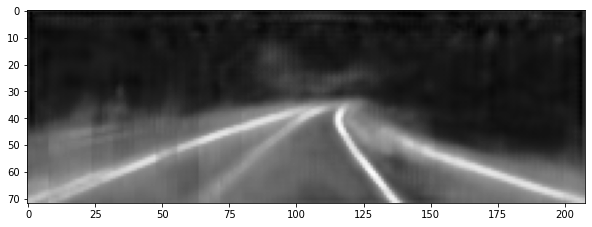

In [60]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()